# 1 Regressão Linear com uma Variavel

Os dados utilizados nessa parte correspondem a população de cada cidade e o lucro da cadeia de food truck daquela cidade. O objetivo é implementar regressão linear para predizer o lucro para cada filial.

## 1.1 Visualização dos Dados

Um importante recurso para conhecer melhor os dados é fazer a sua visualização. Abaixo, é apresentado o gráfico de dispersão (*scatter plot*) dos dados usados nesta primeira parte do trabalho.

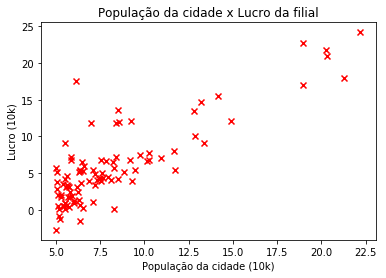

In [1]:
%matplotlib inline  
%run Parte1/plot_ex1data1.py        

Através do gráfico é possível obeservar uma correlação positiva entre as variáveis população e lucro.

## 1.2 Gradiente Descendente

Inicialmente serão exibidos os primeiros valores das variáveis independente e dependente (*feature* e *target*, respectivamente), carregados através do script `features_targets.py`. Por *default* o método abaixo já adiciona $x_0 = 1$.

In [2]:
import features_targets as ft

filepath = os.path.join('Parte1','ex1data1.txt')
X, y = ft.get_features_and_targets(filepath)

In [3]:
X[:5]

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598]])

In [4]:
y[:5]

array([[ 17.592 ],
       [  9.1302],
       [ 13.662 ],
       [ 11.854 ],
       [  6.8233]])

Para verificar a corretude dessa função, os parâmetros $\theta_0$ e $\theta_1$ são inicializados em $zero$. 

In [5]:
%run Parte1/custo_reglin_uni.py

theta = np.transpose(np.array([[0,0]])) #ou np.array([[0],[0]])
custo_reglin_uni(X, y, theta)

32.072733877455676

O gradiente descendente é usado para minimizar a função de Custo $J(\theta_0, \theta_1)$. Ela está implementada em `gd_reglin_uni.py`.

In [6]:
%run Parte1/gd_reglin_uni.py

alpha = 0.01
epochs = 5000
custo, theta = gd_reglin_uni(X, y, alpha, epochs)

print(theta)
print('Custo = ', custo)

[[-3.89530051]
 [ 1.19298539]]
Custo =  4.47697139698


O valor do hiperparâmetro `alpha` (taxa de aprendizagem) e do `epochs` (período) foram definidos inicialmente no trabalho. Se o `dataset` não for dividido em lotes (`batches`), o período será igual ao número de iterações para o processo descrito acima, executado com o objetivo de minimizar a função de custo. Em outro caso, por exemplo, para um `dataset`de 2000 exemplos se o mesmo for dividido em lotes de 500, serão necessárias 4 iterações para completar um período.

Para verificar a convergência, outros valores para `epochs` foram testados, como $10000$, $100000$, $1000000$, este último apresentando o valor do custo de $4.47697137598$. Os valores dos parâmetros $\theta_0$ e $\theta_1$ que minimizam a função de custo são aproximadamente $-3,90$ e $1,19$, respectivamente, 

A reta que corresponde aos parâmetros determinados pode ser visualizada abaixo. Os valores de `population` e `profit` foram gerados pelo script `plot_ex1data1.py`.

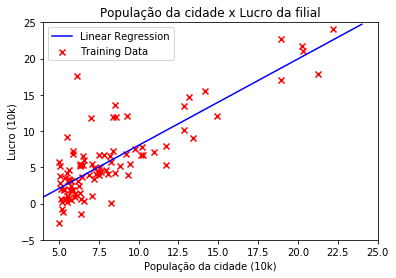

In [7]:
%run Parte1/visualizar_reta.py

visualizar_reta(population, profit, theta)

Para o modelo de regressão linear produzido acima, é possível predizer o lucro em regiões com populações de $35.000$ e $70.000$ habitantes. Para isso, a hipótese da regressão linear é calculada como o produto escalar (*dot product*) de $h_\theta(x) = \theta^Tx$. O valor do lucro para essas duas cidades é obtido pelo código a seguir.

In [8]:
new_X = np.array([35000,70000]).reshape(2,1) # ou np.array([[35000,70000]]).T
new_X = np.insert(new_X, 0, 1, axis=1)

h = new_X.dot(theta)

print('Lucro para 35 mil habitantes = {0:.2f}'.format(h[0,0]))
print('Lucro para 70 mil habitantes = {0:.2f}'.format(h[1,0]))

Lucro para 35 mil habitantes = 41750.59
Lucro para 70 mil habitantes = 83505.08


## 1.3 Visualização de $J(\theta)$

Os scripts `visualizar_J_contour.py` e `visualizar_J_surface.py` produzem, respectivamente, um gráfico de curvas de contorno (*contour plot*) e um gráfico da superfície (*surface plot*) correspondentes
a $J(\theta)$. Através desses gráficos é possível perceber como $J(\theta)$ varia com os valores de $\theta_0$ e $\theta_1$.

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

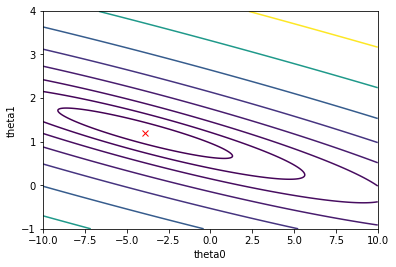

In [9]:
%run Parte1/visualizar_J_contour.py

J = plot_contour(X, y, theta)

<Figure size 432x288 with 0 Axes>

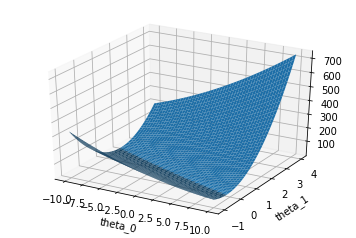

In [10]:
%run Parte1/visualizar_J_surface.py

plot_surface(J)

# 2 Regressão Linear com Múltiplas Variáveis

Nessa parte do trabalho é aplicada regressão linear com múltiplas variáveis para predizer o preço de venda de imóveis. Os dados utilizados são o tamanho do imóvel, a quantidade de quartos e o preço do imóvel.

## Normalização das características

Inicialmente serão exibidos os primeiros valores das variáveis independente e dependente (*feature* e *target*, respectivamente), carregados através do script `features_targets.py`. Diferentemente da chamada anterior, no método para obter as *features* e *targets* do *dataset*, passsou-se como parâmetro `add_ones = False` para evitar o erro `RuntimeWarning: invalid value encountered in divide` ao executar posteriormente a normalização de $X$.

In [11]:
import features_targets as ft

filepath = os.path.join('Parte2','ex1data2.txt')
X, y = ft.get_features_and_targets(filepath, add_ones = False)

In [12]:
X[:5,:]

array([[2104,    3],
       [1600,    3],
       [2400,    3],
       [1416,    2],
       [3000,    4]])

In [13]:
y[:5,:]

array([[399900],
       [329900],
       [369000],
       [232000],
       [539900]])

Para aplicar a normalização ao conjunto de dados do *dataset*, visto as disparidade na ordem de grandeza dos valores absolutos, usa-se o script `normalizacao.py`.

In [14]:
from Parte2 import normalizacao as nr

X_norm, y_norm, mean_X, std_X, mean_y, std_y = nr.normalizar_caracteristica(X, y)

In [15]:
X_norm[:5]

array([[ 0.13141542, -0.22609337],
       [-0.5096407 , -0.22609337],
       [ 0.5079087 , -0.22609337],
       [-0.74367706, -1.5543919 ],
       [ 1.27107075,  1.10220517]])

Após a normalização, adiciona-se a variável independente $x_0 = 1$.

In [16]:
X_norm = np.insert(X_norm, 0, 1, axis=1)
X_norm[:5,:]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

In [17]:
y_norm[:5,:]

array([[ 0.48089023],
       [-0.08498338],
       [ 0.23109745],
       [-0.87639804],
       [ 1.61263744]])

Ao analisar a função `normalizar_caracteristica` é possível verificar que ela funciona para diversos tamanhos de $X$ (quantidade de caracteristicas). Isso ocorre em virtude da técnica chamada **vetorização**. Apesar do nome, refere-se também a *arrays* de duas dimensões (2D) ou mais, e não somente vetores (1D). Em Python, vetores/matrizes (biblioteca *Numpy*) são importantes porque permitem operar os dados sem a necessidade de escrever explicitamente um *loop for* para iterar em cada item. Com o *Numpy*, as operações vetoriais (álgebra linear) são separadas para serem calculadas de forma independente e em lote. Essa técnica torna o código mais claro e mais eficiente computacionalmente.

## Gradiente descendente

A função de custo e o gradiente descente para regressão linear com múltiplas
variáveis, são calculados através `custo_reglin_multi.py` e `gd_reglin_multi.py`, respectivamente. O gradiente descendente é usado para minimizar a função de Custo $J(\theta)$, onde $\theta = <\theta_0, \theta_1,..., \theta_n>$.

In [18]:
%run Parte2/gd_reglin_multi.py

alpha = 0.01
epochs = 5000
theta = np.array([[0,0,0]]).T #inicialização
J, theta = gd(X_norm, y_norm, alpha, epochs, theta)

print(theta)
print('Custo = ', J)

[[ -8.27883861e-17]
 [  8.84765988e-01]
 [ -5.31788195e-02]]
Custo =  0.133527490986


<Figure size 432x288 with 0 Axes>

Para verificar a convergência, outros valores para `epochs` foram testados, como $100$, $1000$, $10000$, $100000$. Os valores dos parâmetros $\theta_0$, $\theta_1$ e $\theta_2$ que minimizam a função de custo são aproximadamente $-8,28$, $8,85$ e $-5,32$, respectivamente.

E possível observar em ambos os scripts que as operações com as características (matriz $X$) é realizada pelo método `.dot()`, um dos métodos responsáveis pelo produto de matrizes na biblioteca Numpy. Esse método dá suporte a operação com qualquer número de linhas e colunas, desde que seja respeitada a regra da multiplicação de matrizes, sendo ela: $A_{mxn} . B_{pxq} = C_{mxq} \Leftrightarrow n = p$. Logo, para poder operar em uma quantidade $n$ de características  (colunas de $X$), é necessário que a outra matriz, no caso $\theta$, possua $n$ número de parâmetros (linhas). Outra propriedade do método `.dot()` é ser vetorizado, e isso significa que ele opera em escalares, mas também em vetores/matrizes. Se um *array* de valores for passado para essa função, ela será aplicada a cada componente do *array*.

# 3 Regressão Logística

## 3.1 Visualização dos dados

Antes de aplicar o metodo de aprendizagem de máquina para construir um modelo de classificação capaz de estimar a probabilidade de admissão de um candidado à Universidade, é importante ter um entendimento dos dados estudados, sendo esse o objetivo do gráfico abaixo.

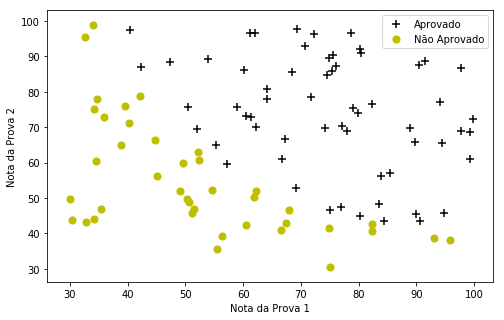

In [19]:
%run Parte3/plot_ex2data1.py

## 3.2 Implementação

### 3.2.1 Função sigmoide

Teste para verificação dos valores de retornos esperados para a função sigmoide.

In [20]:
%run Parte3/sigmoide.py

input = np.array([0,10000,-10000])
sigmoide(input)

array([ 0.5,  1. ,  0. ])

### 3.2.2 Função de custo e gradiente

A seguir, os dados são obtidos e normalizados para o calculo da função de custo e do gradiente descedente.

In [21]:
filepath = os.path.join('Parte3','ex2data1.txt')
examData, labels = ft.get_features_and_targets(filepath, add_ones = False)

In [22]:
examData[:5,:]

array([[ 34.62365962,  78.02469282],
       [ 30.28671077,  43.89499752],
       [ 35.84740877,  72.90219803],
       [ 60.18259939,  86.3085521 ],
       [ 79.03273605,  75.34437644]])

In [23]:
labels[:5]

array([[0],
       [0],
       [0],
       [1],
       [1]])

O script `normalizacao.py` usado na Parte 2 também é aplicado para os dados da regressão logística com o objetivo de normalizar as características.

In [24]:
examData_norm, labels_norm, mean_examData, std_examData, mean_labels, std_labels = nr.normalizar_caracteristica(examData, labels)
examData_norm[:5,:]

array([[-1.60224763,  0.63834112],
       [-1.82625564, -1.2075414 ],
       [-1.53903969,  0.3612943 ],
       [-0.28210129,  1.0863683 ],
       [ 0.69152826,  0.49337794]])

Após a normalização, adiciona-se a variável independente $x_0 = 1$.

In [25]:
examData_norm = np.insert(examData_norm, 0, 1, axis=1)
examData_norm[:5,:]

array([[ 1.        , -1.60224763,  0.63834112],
       [ 1.        , -1.82625564, -1.2075414 ],
       [ 1.        , -1.53903969,  0.3612943 ],
       [ 1.        , -0.28210129,  1.0863683 ],
       [ 1.        ,  0.69152826,  0.49337794]])

Para o calculo da função de custo, o valor do vetor de parâmetros $\theta$ é inicializado em $zero$, onde o tamanho do vetor é definido com base nas $n$ características da matriz `examData_norm`. Nesse caso, $n = 3$ para $examData\_norm = <x_0, x_1, x_2>$.

In [26]:
%run Parte3/custo_reglog.py

theta = np.array([[0,0,0]]) #inicialização
J = custo_reglog(theta, examData_norm, labels)
print('Custo = ', J)

Custo =  0.69314718056


### 3.2.3 Aprendizado dos parâmetros

Assim como na regressão linear, na regressão logística, o objetivo é minimizar $J(\theta)$ com relação ao vetor de parâmetros θ. Abaixo, utiliza-se a implementação do gradiente descendente do script `gd_reglog.py` para encontrar o vetor $\theta$.

In [27]:
%run Parte3/gd_reglog.py

import scipy.optimize as opt

result = opt.fmin_tnc(func=custo_reglog, x0=theta, fprime=gd_reglog, args=(examData_norm, labels))
theta = result[0]
J = custo_reglog(theta, examData_norm, labels)

print('Vetor de parâmetros = ', theta)
print('Custo = ', J)

Vetor de parâmetros =  [ 1.71787865  3.99150586  3.72363974]
Custo =  0.203497715646


### 3.2.4 Avaliação do modelo

Após o treinamento do modelo com os dados de treinamento, modelo correspondente pode predizer se um candidato qualquer será aprovado. Supostamente, se um candidato com notas 45 e 85 na primeira e segunda avaliações, respectivamente, terá a probabilidade de 78% de ser aprovado, como indicado abaixo (aproximadamente 80%, conforme esperado pelo enunciado). 

Importante destacar que os novos valores de avaliação foram normalizados com os valores de média (`mean_examData`) e desvio padrão (`std_examData`) calculados anteriormente para o conjunto de treinamento.

In [28]:
new_examData = np.array([45,85]) 

new_examData_norm = (new_examData - mean_examData) / std_examData
new_examData_norm = np.insert(new_examData_norm, 0, 1)

theta = np.matrix(theta)

h = sigmoide(new_examData_norm.dot(theta.T)) * 100

print('Probabilidade de ser aprovado de {0:.0f}%'.format(h[0,0]))

Probabilidade de ser aprovado de 78%


Avaliar a capacidade de predição é necessário para determinar a qualidade dos parâmetros do modelo construido. No caso de um classificador, como este da Parte 3, uma forma de avaliar é através da seguinte métrica: o quão frequente o classificador está correto. Essa medida de desempenho é chamada acurácia e ela está implementada no script `predizer_aprovacao.py`. 

In [29]:
from Parte3 import predizer_aprovacao as pa

pa.acuracia(examData_norm, theta, labels)

Acurácia de 89%


# 4 Regressão Logística com Regularização

A tarefa nessa parte 4 é utilizar a regressão logística regularizada para prever se os microchips de uma usina de fabricação passam na garantia de qualidade (QA). Os dados correspondem aos resultados de dois testes e a indicação se o microchip foi aceito ou rejeitado após avaliação dos resultados.

## 4.1 Visualização dos Dados

A representação dos dados utilizados é visualizada através do gráfico de dispersão (*scatter plot*) abaixo.

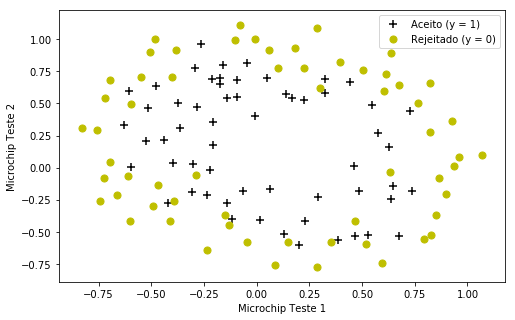

In [30]:
%run Parte4/plot_ex2data2.py

## 4.2 Mapeamento de características (*feature mapping*)

Uma maneira de tornar os dados mais apropriados para a classificação é criar mais características a partir das já existentes. O script `mapFeature.py` produz novas características através da combinação dos polinomios produzidos até o sexto grau.

In [31]:
filepath = os.path.join('Parte4','ex2data2.txt')
X, y = ft.get_features_and_targets(filepath, add_ones = False)
X[:5,:]

array([[ 0.051267,  0.69956 ],
       [-0.092742,  0.68494 ],
       [-0.21371 ,  0.69225 ],
       [-0.375   ,  0.50219 ],
       [-0.51325 ,  0.46564 ]])

In [32]:
from Parte4 import mapFeature as mf

feature_1 = X[:,:1]
feature_2 = X[:,1:]
X = mf.mapFeature(feature_1, feature_2, grau=6)

## 4.3 Função de custo e gradiente

Para verificar a correta implementação da função de custo, o valor do vetor de parâmetros $\theta$ é inicializado em $zero$, onde o tamanho do vetor é definido com base nas $n$ características da matriz $X$. 

Como o valor de $n$ é alto ($n = 28$), sendo custoso inicializá-lo como feito anteriormente, então nesse caso o vetor $\theta$ será inicializado com o método `np.zeros()`, passando o número de colunas (características) da matriz $X$.

In [33]:
%run Parte4/costFunctionReg.py

_lambda = 1
theta = np.zeros((X.shape[1])) #inicialização
J = custo_reglog_reg(theta, X, y, _lambda)
print('Custo = ', J)

Custo =  0.69314718056


No caso acima, para outros valores de $\lambda$, como $\lambda$ = 0 e $\lambda$ = 100, por exemplo, o valor do custo será sempre $0,693$, visto que os valores de inicialização do vetor de parâmetros $\theta$ é zero.

Ainda utilizando o script `costFunctionReg.py`, função `gd_reglog_reg` implementa o algoritmo gradiente descendente. A seguir, os valores ótimos de $\theta$ são calculados com o uso da função de custo e gradiente descendente.

Para $\lambda$ = 0 (sem regularização)

In [34]:
_lambda = 0
theta = np.zeros((X.shape[1])) #inicialização
result = opt.fmin_tnc(func=custo_reglog_reg, x0=theta, fprime=gd_reglog_reg, args=(X, y, _lambda))
theta = result[0]
J = custo_reglog_reg(theta, X, y, _lambda)

print('Vetor de parâmetros = ', theta)
print('\nCusto = ', J)

Vetor de parâmetros =  [   12.77908481    16.49992762     7.36168342  -140.0689641    -82.626573
   -47.32272413  -134.29479797  -113.6610402    -56.14324677    -4.10861092
   510.70466523   507.56922885   566.66305886   258.98915504    56.95402121
   247.5193485    350.83103498   371.75202507   194.13604466    69.46621389
    15.14801323  -600.92424344  -821.86040683 -1106.80924821  -848.64036255
  -706.48745788  -292.82673998   -50.26186711]

Custo =  0.253085734947


Para $\lambda$ = 100

In [35]:
_lambda = 100
theta = np.zeros((X.shape[1])) #inicialização
result = opt.fmin_tnc(func=custo_reglog_reg, x0=theta, fprime=gd_reglog_reg, args=(X, y, _lambda))
theta = result[0]
J = custo_reglog_reg(theta, X, y, _lambda)

print('Vetor de parâmetros = ', theta)
print('\nCusto = ', J)

Vetor de parâmetros =  [  2.87015383e-04  -2.10544242e-03   1.22391072e-03  -6.79678110e-03
  -1.74408066e-03  -4.46041042e-03  -2.26497645e-03  -9.37866502e-04
  -1.13248462e-03  -2.62435498e-03  -5.46183984e-03  -3.06831194e-04
  -1.75796213e-03  -4.68279970e-04  -5.03984839e-03  -2.62545344e-03
  -5.89312935e-04  -4.48411790e-04  -7.84188445e-04  -6.48156747e-04
  -3.88185402e-03  -4.31900558e-03  -1.35539797e-04  -8.84096665e-04
  -4.96564783e-05  -9.97763028e-04  -2.09723993e-04  -5.06602296e-03]

Custo =  0.69276506768


Para $\lambda$ = 1

In [36]:
_lambda = 1
theta = np.zeros((X.shape[1])) #inicialização
result = opt.fmin_tnc(func=custo_reglog_reg, x0=theta, fprime=gd_reglog_reg, args=(X, y, _lambda))
theta = result[0]
J = custo_reglog_reg(theta, X, y, _lambda)

print('Vetor de parâmetros = ', theta)
print('\nCusto = ', J)

Vetor de parâmetros =  [ 0.51126521  0.28141979  0.56732707 -0.89264983 -0.33269562 -0.50931638
  0.06978521 -0.14679472 -0.15051146 -0.04162217 -0.63602971 -0.03068704
 -0.26998237 -0.08940903 -0.47099374 -0.07027425 -0.08868329 -0.0384868
 -0.11459476 -0.10674824 -0.18602658 -0.43208855  0.00445043 -0.13397984
 -0.00181124 -0.14157615 -0.03660799 -0.37996296]

Custo =  0.651887301157


## 4.4 Esboço da fronteira de decisão

A fronteira de decisão visualizada abaixo, separa os exemplos positivos dos negativos. Nesse caso, devido às características dos dados, o limite da decisão é não-linear.

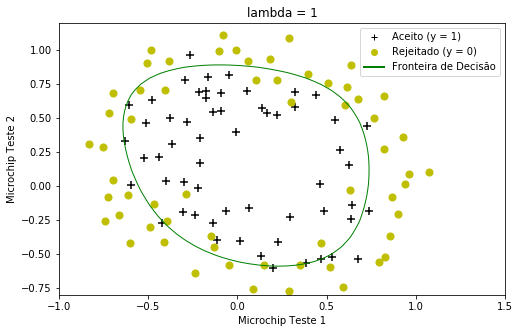

In [37]:
%run Parte4/plot_ex2data2.py
%run Parte4/plotDecisionBoundary.py

plot_boundary(theta, grau=6)

# 5 Regressão Linear com Regularização

Nessa etapa, é implementada regressão linear com regularização para prever a quantidade de água fluindo de uma barragem usando a mudança do nível da agua em um reservatório.

In [38]:
import scipy.io

data = scipy.io.loadmat('Parte5/ex5data1.mat')

_X, y = data['X'], data['y'] #conjunto de treinamento
_Xval, yval = data['Xval'], data['yval'] # conjunto de desenvolvimento
_Xtest, ytest = data['Xtest'], data['ytest'] #conjunto de teste

## 5.1 Visualização dos Dados

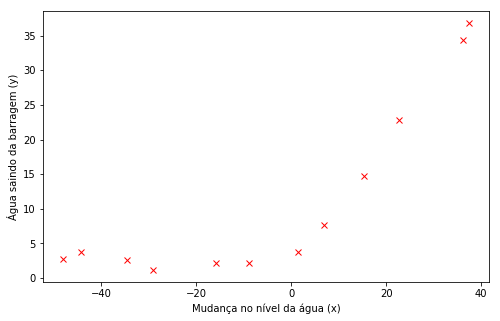

In [39]:
import matplotlib.pyplot as plt

def plot_ex5data1(X, y):
    plt.figure(figsize=(8,5))
    plt.xlabel('Mudança no nível da água (x)')
    plt.ylabel('Água saindo da barragem (y)')
    plt.plot(X,y,'rx')

plot_ex5data1(_X, y)

O script `linearRegCostFunction.py` implementa os cálculos da função de custo, gradiente descendente, além de um método para encontrar o $\theta$ ótimo. As funções estão vetorizadas, evitando assim o uso de *loops*. Nas próximas seções são exibidos os resultados dessa implementação.

## 5.2 Função de custo da regressão linear regularizada

O código abaixo adiciona $x_0 = 1$.

In [40]:
X = np.insert(_X, 0, 1, axis=1)
Xval = np.insert(_Xval , 0, 1, axis=1)
Xtest = np.insert(_Xtest, 0, 1, axis=1)

In [41]:
%run Parte5/linearRegCostFunction.py

_lambda = 1
theta = np.array([[1,1]]) #inicialização
J = custo_reglin_regularizada(theta, X, y, _lambda)
print('Custo = ', J)

Custo =  303.99319222


<Figure size 432x288 with 0 Axes>

## 5.3 Gradiente na regressão linear regularizada

In [42]:
theta = np.array([[1,1]]) #inicialização
gradiente = gd_regularizada(theta, X, y, _lambda=1)

print('Gradiente\n', gradiente)

Gradiente
 [[ -15.30301567]
 [ 598.25074417]]


## 5.4 Ajustando os parâmetros da regressão linear

In [43]:
_lambda = 0
result = encontrar_theta_otimo(theta, X, y, _lambda)
theta = result[0]
J = custo_reglin_regularizada(theta, X, y, _lambda)

print('Vetor de parâmetros = ', theta)
print('Custo = ', J)

Vetor de parâmetros =  [ 13.08790362   0.36777923]
Custo =  22.3739064951


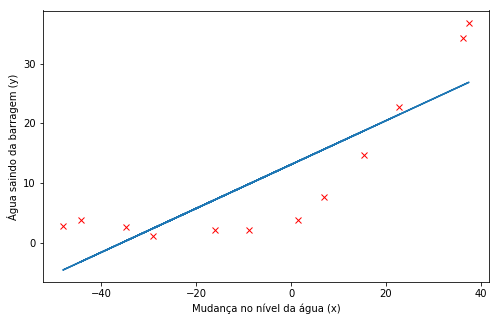

In [44]:
h = X.dot(theta.T)

plot_ex5data1(_X, y)
plt.plot(_X, h)

# 6 Viés-Variância

Nesta parte do trabalho são produzidos gráficos dos erros de treinamento e validação na forma de curvas de aprendizado para diagnosticar problemas de viés e variância.

## 6.1 Curvas de Aprendizado

<Figure size 432x288 with 0 Axes>

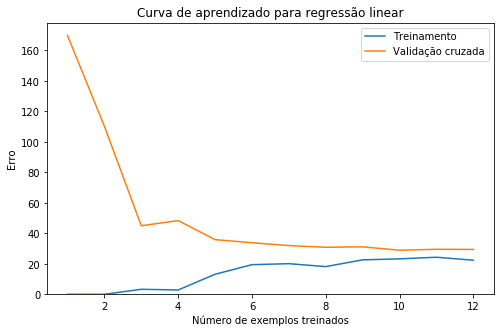

In [45]:
%run Parte6/learningCurve.py

theta = np.array([[1,1]]) #inicialização
numero_exemplos, erros_treino, erros_val = learningCurve(theta, X, y, Xval, yval, _lambda=0)

nome_arquivo = 'Parte6/plot6.1.png'
titulo = 'Curva de aprendizado para regressão linear'
plot_learning_curve(numero_exemplos,erros_treino, erros_val, nome_arquivo, titulo)

O gráfico acima sinaliza o problema de viés alto (*underfitting*) do modelo, ou seja, o modelo construído com a técnica de regressão linear é muito simples e não consegue se ajustear bem ao conjunto de dados.

# 7 Regressão Polinomial

O conjunto de dados exibido abaixo foi obtido na seção 5.

In [46]:
print('X original\n',_X[:5,:])

X original
 [[-15.93675813]
 [-29.15297922]
 [ 36.18954863]
 [ 37.49218733]
 [-48.05882945]]


## 7.1 Regressão Polinomial - aprendizado

Para tentar construir um modelo que melhor se ajuste ao conjunto de dados, a seguir são construídas características para uso no modelo de regressão polinomial através da função `poly_features`.

In [47]:
%run Parte7/poly_features.py

grau = 8
X_poli = poly_features(_X, grau)

<Figure size 432x288 with 0 Axes>

In [48]:
X_norm, y_norm, mean_X, std_X, mean_y, std_y = nr.normalizar_caracteristica(X_poli, y)
print(X_norm[:5,:4]) #exibição somente das 4 primeiras colunas

[[ -3.78243704e-01  -7.88662325e-01   1.90328720e-01  -7.37591303e-01]
 [ -8.38920100e-01   1.31420204e-03  -2.58961742e-01  -3.41564822e-01]
 [  1.43871736e+00   6.10831582e-01   1.30534069e+00   2.56220001e-01]
 [  1.48412330e+00   7.38068463e-01   1.42031240e+00   4.13121830e-01]
 [ -1.49791929e+00   1.93643966e+00  -2.12774745e+00   2.43510061e+00]]


In [49]:
X_norm = np.insert(X_norm, 0, 1, axis=1)
print(X_norm[:5,:4]) #exibição somente das 4 primeiras colunas

[[  1.00000000e+00  -3.78243704e-01  -7.88662325e-01   1.90328720e-01]
 [  1.00000000e+00  -8.38920100e-01   1.31420204e-03  -2.58961742e-01]
 [  1.00000000e+00   1.43871736e+00   6.10831582e-01   1.30534069e+00]
 [  1.00000000e+00   1.48412330e+00   7.38068463e-01   1.42031240e+00]
 [  1.00000000e+00  -1.49791929e+00   1.93643966e+00  -2.12774745e+00]]


In [50]:
%run Parte5/linearRegCostFunction.py

_lambda = 0.003
theta = np.ones((X_norm.shape[1])) #inicialização
result = encontrar_theta_otimo(theta, X_norm, y, _lambda)
theta = result[0]

print('Vetor de parâmetros\n',theta)

Vetor de parâmetros
 [ 11.21741516  11.24759535  13.3667595    8.47664286  -9.34749626
 -10.41970327   4.37507541   1.48165552  -3.64657688]


Foram gerados através da função `np.linspace` $50$ valores no intervalos de $[-65,60]$. Dessa forma tem-se coordenadas igualmente espaçadas para plotar o comportamento da curva polinomial. No entanto, antes desses valores serem aplicados a hipótese $h$ do modelo, é necessário construir as características polinomiais, nesse caso de $grau = 8$, e normalizá-los no mesmo "padrão" em que o modelo foi treinado. Por essa razão, aplica-se `mean_X` e `std_X` calculados anteriormente na normalização das *features* do modelo.

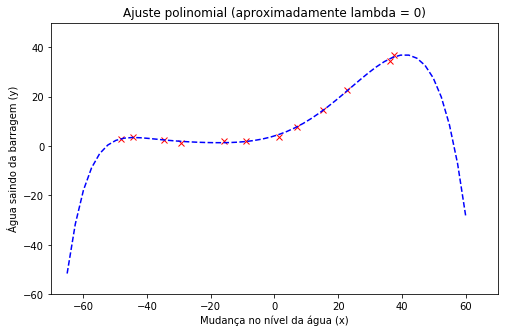

In [51]:
x = np.linspace(-65,60,50)
x_poli = poly_features(x, grau)
x_poli = (x_poli - mean_X) / std_X
x_poli = np.insert(x_poli, 0, 1, axis=1)

h = x_poli.dot(np.matrix(theta).T)

plot_ex5data1(_X, y)
plt.plot(x, h, 'b--')
plt.title('Ajuste polinomial (aproximadamente lambda = 0)')
plt.axis((-70,70,-60,50))
plt.show()

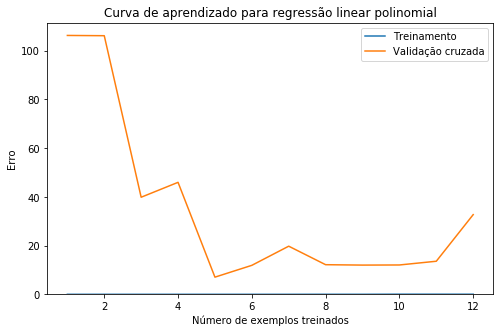

In [52]:
X_poli_val = poly_features(_Xval, grau)
X_norm_val, y_norm_val,_,_,_,_ = nr.normalizar_caracteristica(X_poli_val, yval)
X_norm_val = np.insert(X_norm_val, 0, 1, axis=1)

theta = np.ones((X_norm_val.shape[1])) #inicialização
numero_exemplos, erros_treino, erros_val = learningCurve(theta, X_norm, y, X_norm_val, yval, _lambda=0)

nome_arquivo = 'Parte7/plot7.2.png'
titulo = 'Curva de aprendizado para regressão linear polinomial'

plot_learning_curve(numero_exemplos, erros_treino, erros_val, nome_arquivo, titulo)

Já nesse caso estudado na parte 7, o modelo possui um erro de treinamento bem baixo, visto que o modelo se ajusta bem ao conjunto de treinamento (conforme visualizado pelo gráfico anterior). No entanto, há uma lacuna entre os erros de treinamento e validação cruzada, indicando um problema de variância alta (*overfitting*).